<a href="https://colab.research.google.com/github/AnYeongJu/Digital-image-processing/blob/main/%EB%94%94%EC%A7%80%ED%84%B8%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 라플라시안 연산자

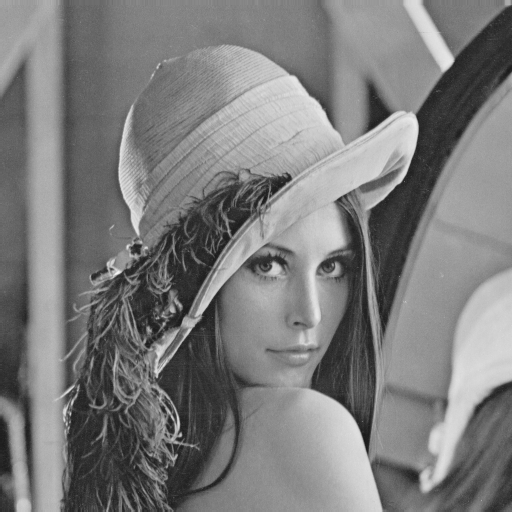

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


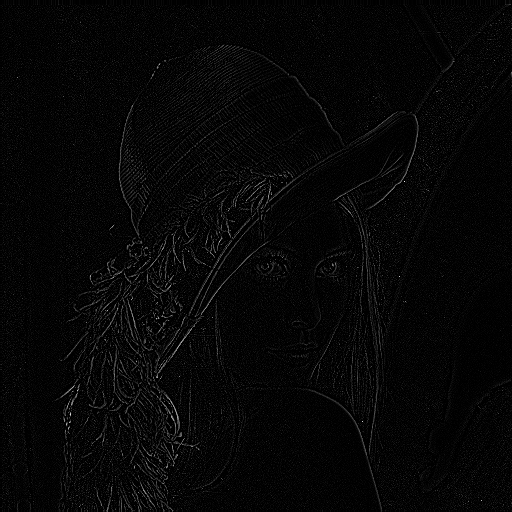

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


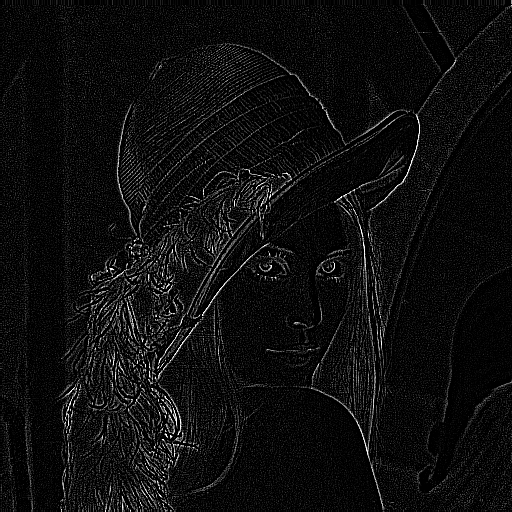

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


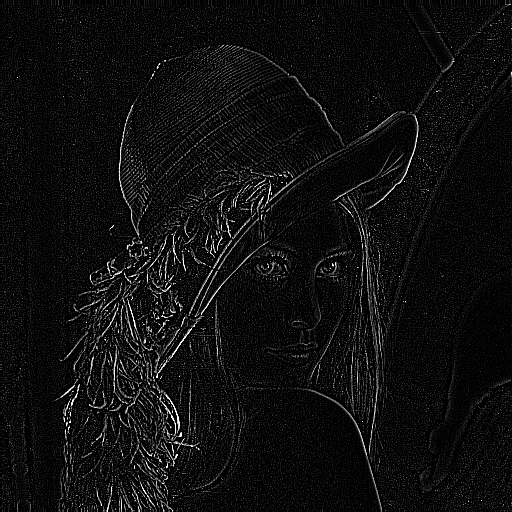

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

#라플라시안 회선 마스크
mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
mask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
mask3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

laplacian1 = cv2.filter2D(gray, -1, mask1)
laplacian2 = cv2.filter2D(gray, -1, mask2)
laplacian3 = cv2.filter2D(gray, -1, mask3)


cv2_imshow(gray)
cv2_imshow(laplacian1.astype(np.float))
cv2_imshow(laplacian2.astype(np.float))
cv2_imshow(laplacian3.astype(np.float))

2. LoG 연산자

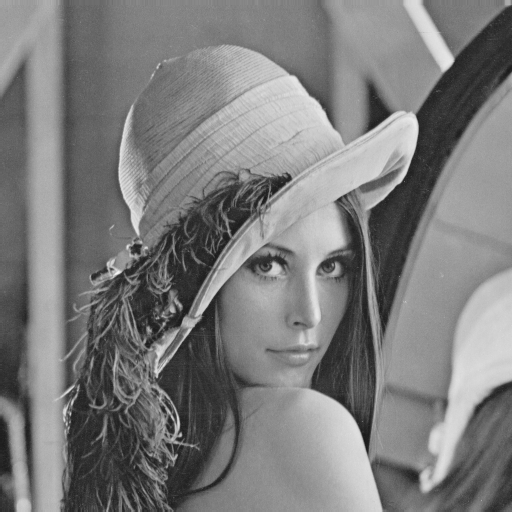

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


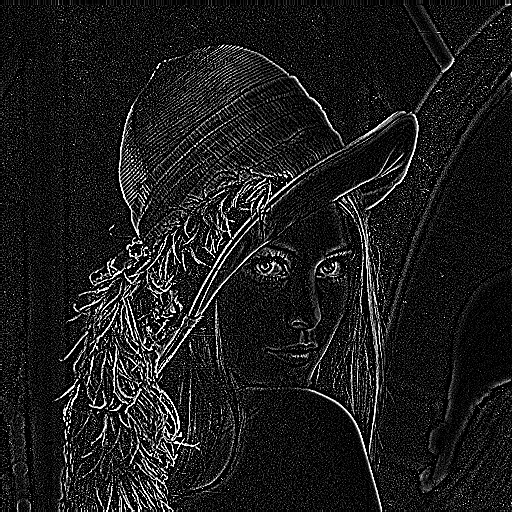

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

#가우시안 스무딩 : gaussian 필터 처리해서 블러된 이미지를 얻는다.
gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

#LoG 회선 마스크 : 블러된 이미지를 마스크로 컨볼루션해주면 엣지 영상을 얻을 수 있다.
mask1 = np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0],
                           [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0],
                           [0, 0, -1, 0, 0]])
 
Log = cv2.filter2D(gray, -1, mask1)

cv2_imshow(gray)
cv2_imshow(Log.astype(np.float))

3. DoG 연산자

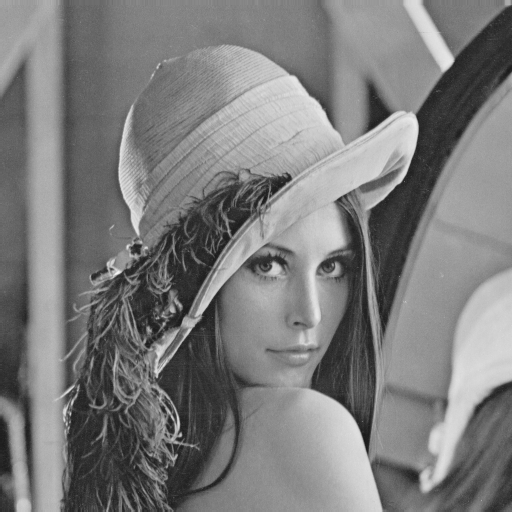

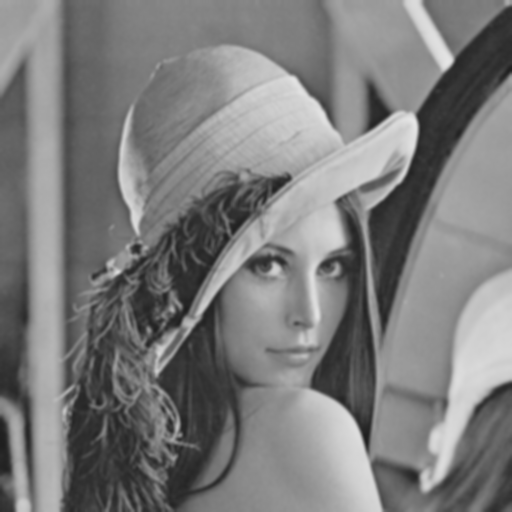

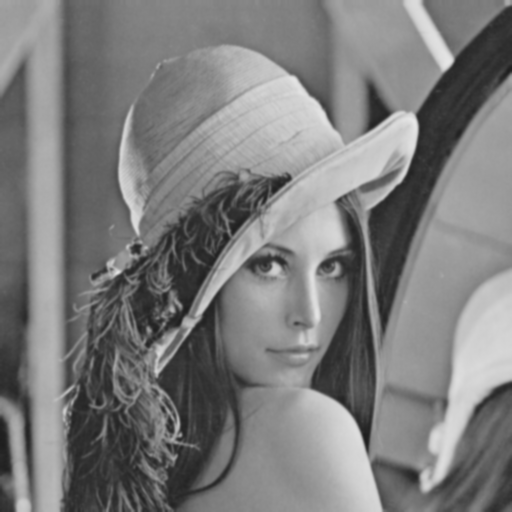

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


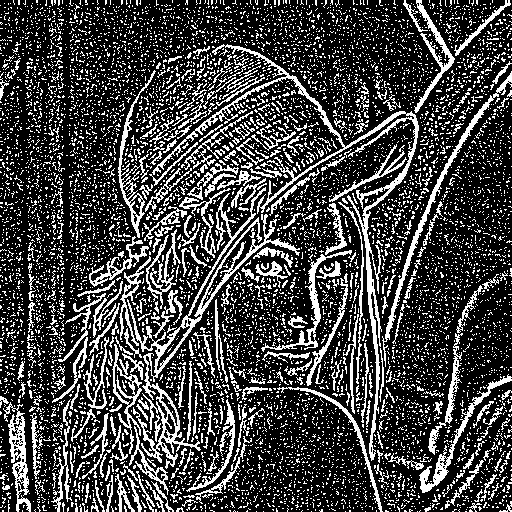

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

#다른 값을 가진 두개의 가우시안 마스크를 차연산 : 1/1.6
gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)

#화소의 차이를 출력할 배열에 넣어줍니다.
Dog = np.zeros_like(gray)
for i in range(height):
        for j in range(width):
            Dog[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

cv2_imshow(gray)
cv2_imshow(gaussian1)
cv2_imshow(gaussian2)
cv2_imshow(Dog.astype(np.float))

4. Kuwahara 필터링

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


def kuwahara(pic, r=5, resize=False, rate=0.5):  # 원래 이미지, 정사각형 영역의 한 변, 리사이즈 비율
    h, w, _ = pic.shape
    if resize: pic = cv2.resize(pic, (int(w * rate), int(h * rate)));h, w, _ = pic.shape
    pic = np.pad(pic, ((r, r), (r, r), (0, 0)), "edge")
    ave, var = cv2.integral2(pic)
    ave = (ave[:-r - 1, :-r - 1] + ave[r + 1:, r + 1:] - ave[r + 1:, :-r - 1] - ave[:-r - 1, r + 1:]) / (
            r + 1) ** 2  # 평균 일괄 계산
    var = ((var[:-r - 1, :-r - 1] + var[r + 1:, r + 1:] - var[r + 1:, :-r - 1] - var[:-r - 1, r + 1:]) / (
            r + 1) ** 2 - ave ** 2).sum(axis=2)  # 분산의 일괄 계산

    def filt(i, j):
        return np.array([ave[i, j], ave[i + r, j], ave[i, j + r], ave[i + r, j + r]])[(
            np.array([var[i, j], var[i + r, j], var[i, j + r], var[i + r, j + r]]).argmin(axis=0).flatten(),
            j.flatten(),
            i.flatten())].reshape(w, h, _).transpose(1, 0, 2)

    return filtered_pic


# 이미지 추가
picture = np.array(plt.imread("Lenna.png"))
filtered_pic = kuwahara(pic=picture, r=15, resize=False, rate=0.2)
plt.imshow(filtered_pic)
plt.axis("off")
plt.show()

* 임펄스 잡음 생성 (소금,후추) 


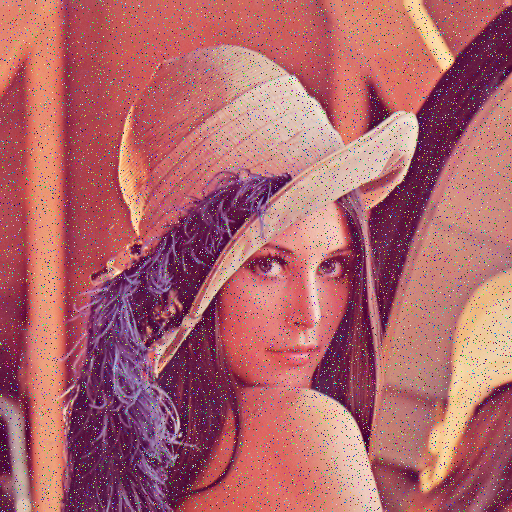

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy
from random import randint

def SaltPepper(img):
    # 이미지의 크기 얻기
    if img.ndim > 2:  # 색상
        height, width, _ = img.shape
    else:  # 그레이스케일
        height, width = img.shape

    result = copy.deepcopy(img)

    # 이미지의 일부 픽셀을 무작위로 선택
    # height*width/80과 height*width/10 사이의 임의의 숫자를 선택
    number_of_pixels = randint(int(height * width / 100), int(height * width / 10))

    for i in range(number_of_pixels):
         # 임의의 y 좌표를 선택
        y_coord = randint(0, height - 1)

        # 임의의 x 좌표를 선택
        x_coord = randint(0, width - 1)

        if result.ndim > 2:
            result[y_coord][x_coord] = [randint(0, 255), randint(0, 255), randint(0, 255)]
        else:
            # 해당 픽셀을 흰색으로 색칠
            result[y_coord][x_coord] = 255

    # 이미지의 일부 픽셀을 무작위로 선택
    # height*width/80과 height*width/10 사이의 임의의 숫자를 선택
    for i in range(number_of_pixels):
       # 임의의 y 좌표를 선택
        y_coord = randint(0, height - 1)

        # 임의의 x 좌표를 선택
        x_coord = randint(0, width - 1)

        if result.ndim > 2:
            result[y_coord][x_coord] = [randint(0, 255), randint(0, 255), randint(0, 255)]
        else:
            # 해당 픽셀을 흰색으로 색칠
            result[y_coord][x_coord] = 0

    return result

img = cv2.imread('Lenna.png')
noise_img = SaltPepper(img)

cv2_imshow(noise_img)

6. 미디언 필터

In [ ]:
#미디언 필터 함수사용
gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

median = cv2.medianBlur(gray, 3)
cv2_imshow(median)

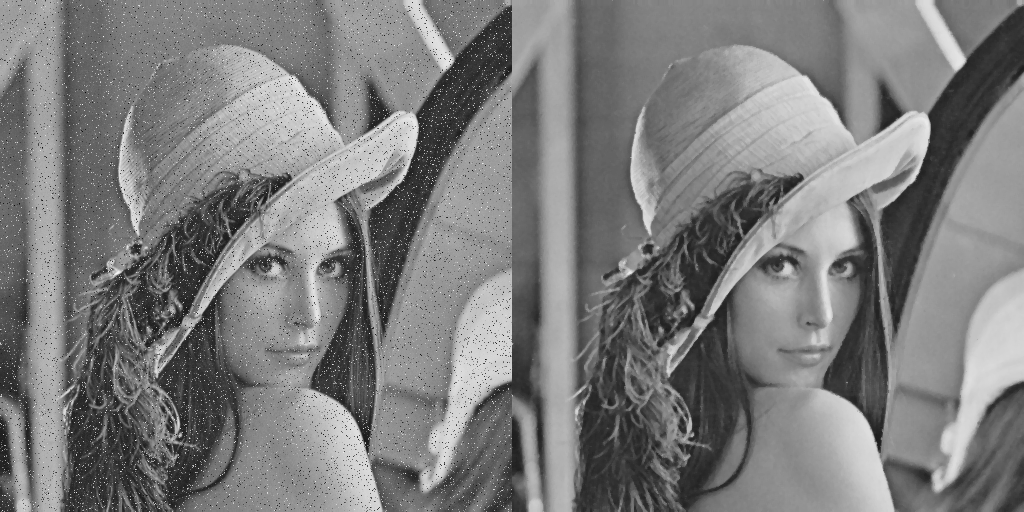

In [ ]:
import numpy as np
import cv2

#임펄스 영상 흑백으로 불러오기
input_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)


KERNEL_SIZE = 3


# 중간값 필터
def med_filter(img):
    height, width = img.shape
    result = np.zeros((height, width), np.uint8)
    kernel = []

    for x in range(width):
        for y in range(height):
            # [y][x]결과를 만들기 위해서 커널을 만들고 정렬
            for i in range(x - int(KERNEL_SIZE/2), x + int(KERNEL_SIZE/2) + 1):
                if i < 0 or i >= width:
                    continue
                for j in range(y - int(KERNEL_SIZE/2), y + int(KERNEL_SIZE/2) + 1):
                    if j < 0 or j >= height:
                        continue
                    kernel.append(img[j][i])
            kernel.sort()
            result[y][x] = kernel[int(len(kernel)/2)]
            kernel.clear()

    return result

med_img = med_filter(input_img)
result_img = cv2.hconcat([input_img, med_img])

cv2_imshow(result_img)